In [13]:
# Importing required libraries
import pandas as pd

# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge datasets
merged_data = pd.merge(transactions, customers, on="CustomerID", how="inner")
merged_data = pd.merge(merged_data, products, on="ProductID", how="inner")

# Display the first few rows
print("First few rows of the merged dataset:")
print(merged_data.head())

# Check dataset information
print("\nDataset Information:")
print(merged_data.info())

# Check for missing values
print("\nMissing Values in Dataset:")
print(merged_data.isnull().sum())


First few rows of the merged dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.6

In [15]:
import pandas as pd

# Display the first few rows and inspect column names
print("First few rows of the merged dataset:")
print(merged_data.head())

# Check for columns in the dataset
print("\nColumns in the dataset:")
print(merged_data.columns)

# Rename 'Price_x' to 'Price' for clarity (assuming 'Price_x' is the relevant column)
if 'Price_x' in merged_data.columns:
    merged_data.rename(columns={'Price_x': 'Price'}, inplace=True)
    print("\n'Price_x' renamed to 'Price'.")
elif 'Price_y' in merged_data.columns:
    merged_data.rename(columns={'Price_y': 'Price'}, inplace=True)
    print("\n'Price_y' renamed to 'Price'.")
else:
    print("\nPrice column not found in the dataset.")

# Verify column renaming
print("\nUpdated Columns:")
print(merged_data.columns)

# Summary statistics for numeric columns
print("\nSummary Statistics for Numeric Columns:")
try:
    print(merged_data[['Quantity', 'TotalValue', 'Price']].describe())
except KeyError as e:
    print(f"\nKeyError: {e}. Please ensure the correct column names are being used.")


First few rows of the merged dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.6


Monthly Sales Trend:
TransactionDate
2023-12-01     3769.52
2024-01-01    66376.39
2024-02-01    51459.27
2024-03-01    47828.73
2024-04-01    57519.06
2024-05-01    64527.74
2024-06-01    48771.18
2024-07-01    71366.39
2024-08-01    63436.74
2024-09-01    70603.75
2024-10-01    47063.22
2024-11-01    38224.37
2024-12-01    59049.20
Freq: MS, Name: TotalValue, dtype: float64


Matplotlib is building the font cache; this may take a moment.


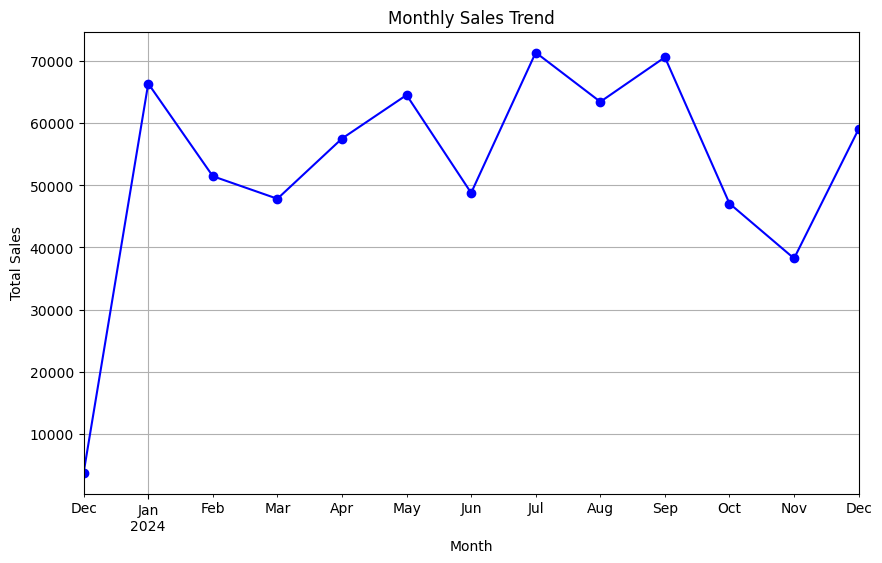

In [16]:
# Ensure 'TransactionDate' is in datetime format
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])

# Group sales by month
monthly_sales = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()

# Convert PeriodIndex to DatetimeIndex
monthly_sales.index = monthly_sales.index.to_timestamp()

# Display monthly sales
print("\nMonthly Sales Trend:")
print(monthly_sales)

# Plot the monthly sales trend
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', title="Monthly Sales Trend", xlabel="Month", ylabel="Total Sales", color="blue", marker="o")
plt.grid()
plt.show()



Top 10 Products by Revenue:
ProductName
ActiveWear Smartwatch      39096.97
SoundWave Headphones       25211.64
SoundWave Novel            24507.90
ActiveWear Jacket          22712.56
ActiveWear Rug             22314.43
TechPro Headphones         19513.80
BookWorld Cookbook         19221.99
BookWorld Sweater          18743.79
TechPro Textbook           18267.96
ActiveWear Cookware Set    18083.73
Name: TotalValue, dtype: float64


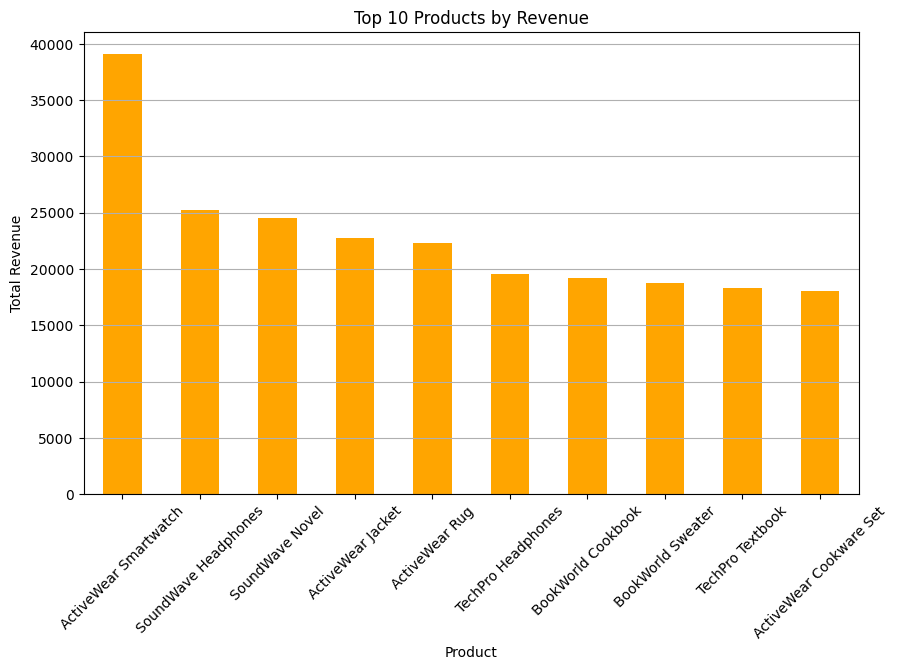

In [17]:
# Calculate total revenue for each product
top_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False)

# Display top 10 products
print("\nTop 10 Products by Revenue:")
print(top_products.head(10))

# Plot top 10 products
top_products.head(10).plot(kind='bar', figsize=(10, 6), title="Top 10 Products by Revenue", xlabel="Product", ylabel="Total Revenue", color='orange')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



Sales by Region:
Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64


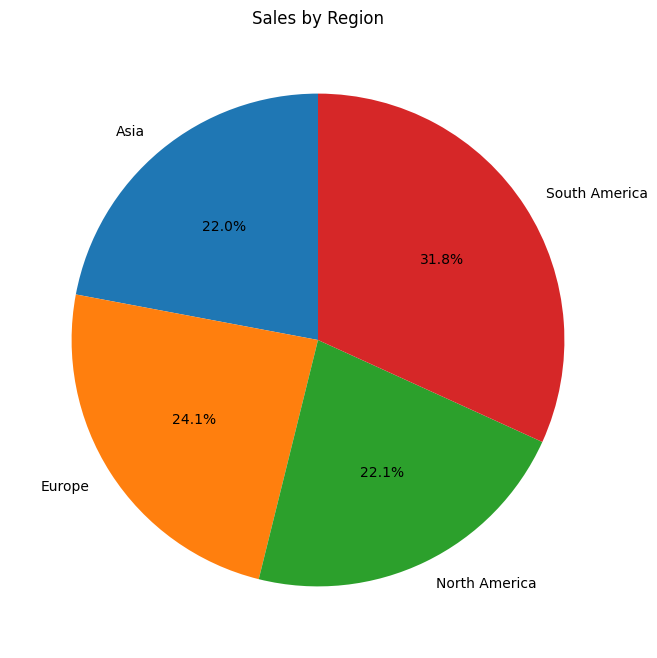

In [18]:
# Calculate total revenue by region
region_sales = merged_data.groupby('Region')['TotalValue'].sum()

# Display sales by region
print("\nSales by Region:")
print(region_sales)

# Plot sales by region
region_sales.plot(kind='pie', figsize=(8, 8), title="Sales by Region", autopct='%1.1f%%', startangle=90)
plt.ylabel("")  # Remove the y-axis label
plt.show()



Top 10 Customers by Total Spending:
CustomerName
Paul Parsons            10673.87
Bruce Rhodes             8040.39
Gerald Hines             7663.70
William Adams            7634.45
Aimee Taylor             7572.91
Anna Ball                7111.32
Mrs. Kimberly Wright     7073.28
Jennifer Pena            6819.57
Rodney Eaton             6715.72
Juan Mcdaniel            6708.10
Name: TotalValue, dtype: float64


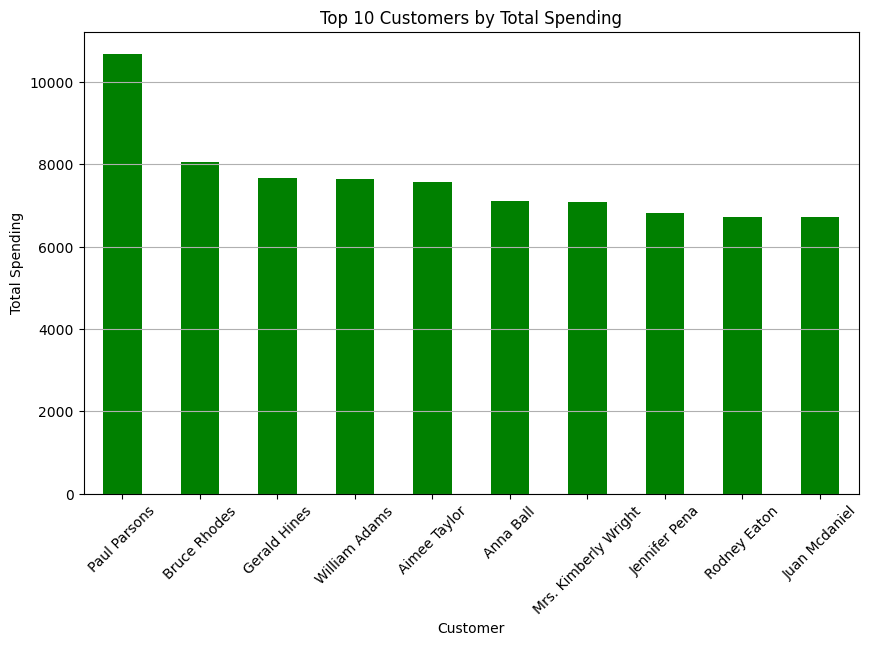

In [19]:
# Calculate total spending by each customer
top_customers = merged_data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False)

# Display top 10 customers
print("\nTop 10 Customers by Total Spending:")
print(top_customers.head(10))

# Plot top 10 customers
top_customers.head(10).plot(kind='bar', figsize=(10, 6), title="Top 10 Customers by Total Spending", xlabel="Customer", ylabel="Total Spending", color='green')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
